In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering 
import pandas as pd



In [2]:


df = pd.read_json('Raw2022.json')


In [3]:
df['locdate'] = df['timestamp'].dt.date

df['year'] = df['timestamp'].dt.year

df = df.set_index('timestamp')

df['latitude'] = df['latitudeE7']/10000000
df['longitude'] = df['longitudeE7']/10000000

df = df.drop(['latitudeE7', 'longitudeE7', 'accuracy', 'source', 'deviceDesignation', 'deviceTag', 'activity'], axis=1)

df[['latitude', 'longitude']]

,latitude,longitude
timestamp,,
2010-12-29 16:15:06.943000+00:00,42.924850,-85.594667
2010-12-29 16:20:55.513000+00:00,42.916394,-85.615692
2010-12-29 16:24:46.513000+00:00,42.922736,-85.599923
2010-12-29 16:28:12.243000+00:00,42.914280,-85.620948
2010-12-29 16:33:54.332000+00:00,42.922736,-85.599923
...,...,...
2021-12-26 20:29:53.632000+00:00,33.481746,-117.068038
2021-12-26 20:32:34.999000+00:00,33.481766,-117.067929
2021-12-26 20:45:39.455000+00:00,33.481270,-117.067804


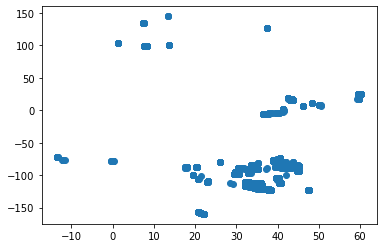

In [5]:
plt.scatter(df['latitude'], df['longitude'])
X = df[['latitude', 'longitude']]

In [17]:
kmeans = KMeans(
    init="random",
    n_clusters=100,
    n_init=10,
    max_iter=300,
    random_state=42
)

kmeans.fit(df[['latitude', 'longitude']])

KMeans(init='random', n_clusters=100, random_state=42)

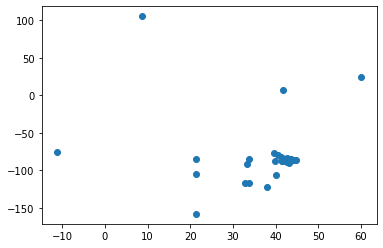

In [18]:
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1])

In [9]:
from sklearn.cluster import AgglomerativeClustering 
#classifier = AgglomerativeClustering(n_clusters = 30, affinity = 'euclidean', linkage = 'complete') 
classifier = AgglomerativeClustering(n_clusters=None, distance_threshold = 1, affinity = 'euclidean', linkage = 'single') 
clusters = classifier.fit_predict(X)

In [10]:
import numpy as np
np.unique(clusters)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50],
      dtype=int64)

Text(0, 0.5, '$x_2$')

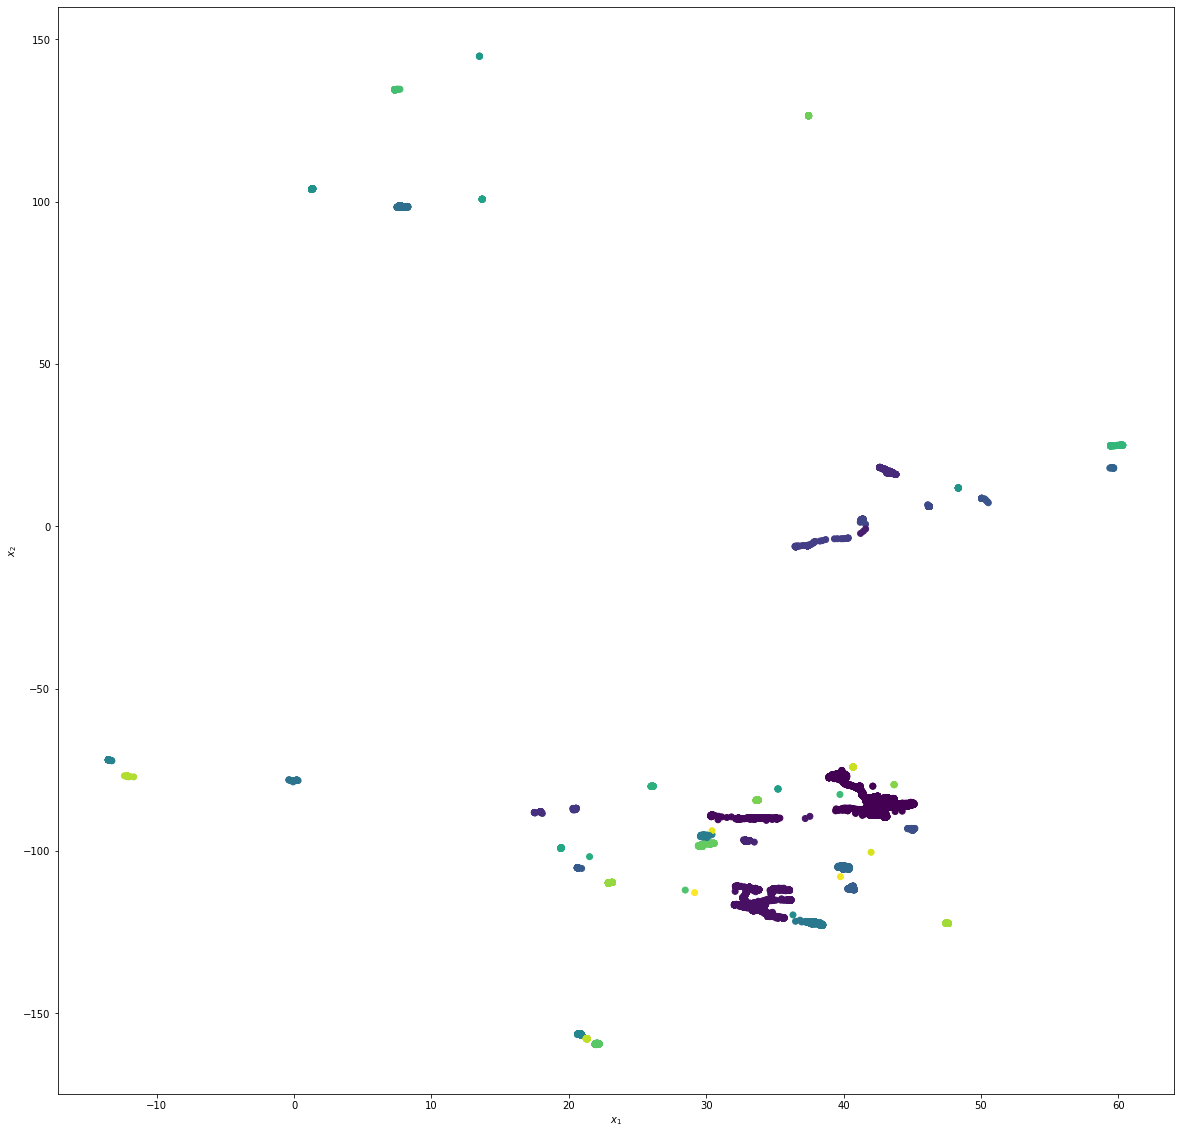

In [12]:
# Visualizing
plt.figure(figsize= (20,20))
plt.scatter(X['latitude'], 
X['longitude'], 
c=clusters)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
